In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle


In [18]:
# parameters
filename = 'avgfp'
wildtype = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

# load into dataframe
df = pd.read_csv(f'{filename}.tsv', sep='\t')
# print(df.columns)

# Function to apply mutations to the wildtype sequence
def apply_mutations(wildtype, mutations):
    # Convert the wildtype string into a list for mutability
    sequence_list = list(wildtype)
    for mutation in mutations.split(','):
        pos = int(mutation[1:-1]) + 1  # Convert to 0-based index
        mut_residue = mutation[-1]
        sequence_list[pos] = mut_residue  # Apply the mutation
    return ''.join(sequence_list)

# Function to adjust mutation indexing for the mutations column
def adjust_mutation_indexing(mutation):
    parts = mutation.split(',')
    adjusted_mutations = []
    for part in parts:
        # Split each mutation into its components
        original_aa = part[0]
        position = int(part[1:-1])
        mutated_aa = part[-1]
        # Adjust position by adding 1
        adjusted_position = position + 1
        adjusted_mutations.append(f"{original_aa}{adjusted_position}{mutated_aa}")
    return ','.join(adjusted_mutations)

# Apply mutations to generate sequences
df['sequence'] = df['variant'].apply(lambda x: apply_mutations(wildtype, x))

# Adjust mutations column to reflect new indexing
df['mutations'] = df['variant'].apply(adjust_mutation_indexing)

# Rename columns
df.rename(columns={'score': 'functional_score'}, inplace=True)

# Select and reorder the relevant columns
df = df[['sequence', 'mutations', 'num_mutations', 'functional_score']]

# Save the processed DataFrame to a pickle file
df.to_pickle('SeqFxnDataset.pkl')

In [19]:
df.head()

,sequence,mutations,num_mutations,functional_score
0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,A109D,1,1.301030
1,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"A109D,N145D,I187V,M232T,L235P",5,1.301031
2,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"A109D,Y142N,H147L,E221G",4,1.301189
3,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,A109G,1,3.708478
4,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"A109G,K139M,R167C,L235P",4,3.582764


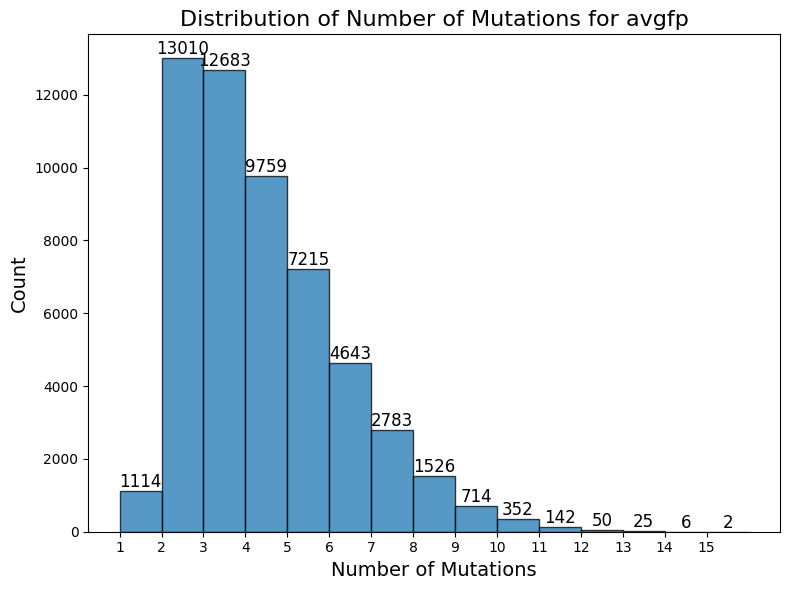

In [23]:
num_mutations = df['num_mutations']

# Determine the range for integer bins based on the data
min_mut = int(num_mutations.min())
max_mut = int(num_mutations.max())

# Create integer bins for each mutational regime
bins = np.arange(min_mut, max_mut + 2)  # +2 to include the last edge
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(num_mutations, bins=bins, edgecolor='black', alpha=0.75)

# Formatting the plot
plt.xlabel('Number of Mutations', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title(f'Distribution of Number of Mutations for {filename}', fontsize=16)
plt.xticks(np.arange(min_mut, max_mut + 1))
# Annotate each bar with the count
for count, patch in zip(counts, patches):
    x_center = patch.get_x() + patch.get_width() / 2
    plt.text(x_center, patch.get_height(), int(count), ha='center', va='bottom', fontsize=12)

# Adjust layout and save the figure
output_filename = f'{filename}_num_mutations_histogram.png'
plt.tight_layout()
plt.savefig(output_filename)
plt.show()
